## 1.3.2 Arithmetic Operations on Images

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [77]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [78]:
x = 250
y = 10
x+y

260

In [79]:
x = np.uint8([250])

In [80]:
print(x)

[250]


In [81]:
y = np.uint8([10])

In [82]:
print(y)

[10]


In [83]:
x+y

array([4], dtype=uint8)

In [84]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [107]:
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('cat.jpg')

In [108]:
def Alpha(x):
    alpha = x/255
    blend = cv2.addWeighted(img1, 1-alpha,img2,alpha,0)
    cv2.imshow('image', blend)

In [109]:
cv2.imshow('image',img1)
cv2.createTrackbar('weight','image',0,255,Alpha)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [110]:
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('opencv.png')

In [111]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows,cols,channels)

199 200 3


In [112]:
roi = img1[0:rows, 0:cols ]

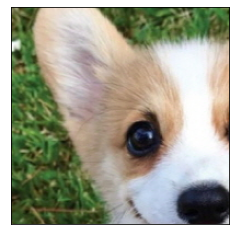

In [113]:
pltImage(roi)

In [92]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

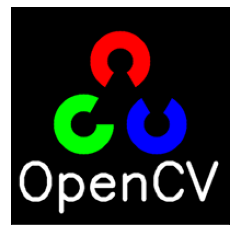

In [93]:
pltImage(img2)

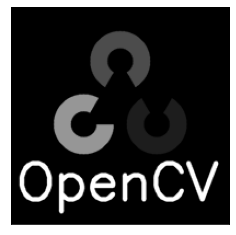

In [94]:
pltImage(img2gray)

In [95]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

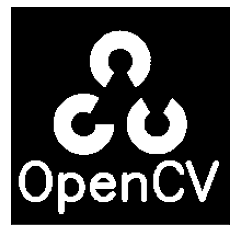

In [96]:
pltImage(mask)

In [97]:
mask_inv = cv2.bitwise_not(mask)

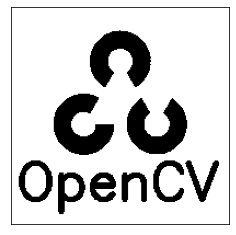

In [98]:
pltImage(mask_inv)

In [99]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

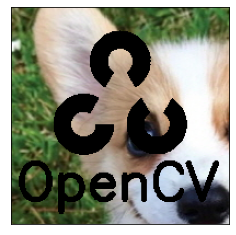

In [100]:
pltImage(img1_bg)

In [101]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

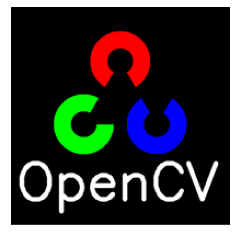

In [102]:
pltImage(img2_fg)

In [103]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [104]:
img1[0:rows, 0:cols ] = dst

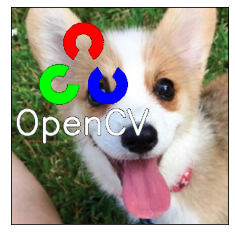

In [105]:
pltImage(img1)

In [106]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()